In [1]:
import pandas as pd 
import numpy as np
import string 
import re 
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# Baca DataFrame dari dataset_komentar_instragram_cyberbulling.csv

In [2]:
df = pd.read_excel('versi 4.0.2.xlsx')

In [3]:
df

,Sentiment,content,score,reviewCreatedVersion
0,Negative,Biasanya saya scan QR code di lobby kantor set...,1,4.0.2
1,Negative,Setelah di-update versi terbaru kok malah gak ...,1,4.0.2
2,Negative,Sekarang Update terbaru malah ga bisa masuk ad...,1,4.0.2
3,Negative,Gimana ini aplikasi kok gak bisa di gunakan. S...,1,4.0.2
4,Negative,"Sebelumnya ada pilihan warga negara, saya suda...",1,4.0.2
...,...,...,...,...
1943,Negative,aku gak bis masuknya,5,4.0.2
1944,Negative,Ko gx bisa login.,5,4.0.2
1945,Negative,Koq gak mau kebuka,5,4.0.2
1946,Positive,Semoga sehat semua,5,4.0.2


In [4]:
df_skripsi = df.drop(['score','reviewCreatedVersion'],axis = 1)

In [5]:
df_skripsi

,Sentiment,content
0,Negative,Biasanya saya scan QR code di lobby kantor set...
1,Negative,Setelah di-update versi terbaru kok malah gak ...
2,Negative,Sekarang Update terbaru malah ga bisa masuk ad...
3,Negative,Gimana ini aplikasi kok gak bisa di gunakan. S...
4,Negative,"Sebelumnya ada pilihan warga negara, saya suda..."
...,...,...
1943,Negative,aku gak bis masuknya
1944,Negative,Ko gx bisa login.
1945,Negative,Koq gak mau kebuka
1946,Positive,Semoga sehat semua


In [6]:
komennegatif= df_skripsi[df_skripsi['Sentiment'] == "Negative"]

In [7]:
komenpositif= df_skripsi[df_skripsi['Sentiment'] == "Positive"]

In [8]:
komennegatif100 = komennegatif.head(200)
komenpositif100 = komenpositif.head(200)

In [9]:
df_komen100 = komennegatif100.merge(komenpositif100 , how='outer')
df_komen100

,Sentiment,content
0,Negative,Biasanya saya scan QR code di lobby kantor set...
1,Negative,Setelah di-update versi terbaru kok malah gak ...
2,Negative,Sekarang Update terbaru malah ga bisa masuk ad...
3,Negative,Gimana ini aplikasi kok gak bisa di gunakan. S...
4,Negative,"Sebelumnya ada pilihan warga negara, saya suda..."
...,...,...
395,Positive,Terimakasih karena app ini saya biasa check ou...
396,Positive,Aplikasinya bagus cepat koneksinya aplikaai Pe...
397,Positive,"Ok saya sudah mempergunakan, cara pengecekan s..."
398,Positive,"Akhirnya sertifikat saya ada jga, sesuai janji..."


# Mendeteksi Positif & Negatif

In [10]:
df_komen100.Sentiment.value_counts()

Negative    200
Positive    200
Name: Sentiment, dtype: int64

In [11]:
df_skripsi = df_komen100

# Menampilkan Bagian kolom pada data

In [12]:
df_skripsi.columns = ['label','text']

In [13]:
df_skripsi['text_real'] = df_skripsi.text

# Menampilkan DataFrame

In [14]:
df_skripsi

,label,text,text_real
0,Negative,Biasanya saya scan QR code di lobby kantor set...,Biasanya saya scan QR code di lobby kantor set...
1,Negative,Setelah di-update versi terbaru kok malah gak ...,Setelah di-update versi terbaru kok malah gak ...
2,Negative,Sekarang Update terbaru malah ga bisa masuk ad...,Sekarang Update terbaru malah ga bisa masuk ad...
3,Negative,Gimana ini aplikasi kok gak bisa di gunakan. S...,Gimana ini aplikasi kok gak bisa di gunakan. S...
4,Negative,"Sebelumnya ada pilihan warga negara, saya suda...","Sebelumnya ada pilihan warga negara, saya suda..."
...,...,...,...
395,Positive,Terimakasih karena app ini saya biasa check ou...,Terimakasih karena app ini saya biasa check ou...
396,Positive,Aplikasinya bagus cepat koneksinya aplikaai Pe...,Aplikasinya bagus cepat koneksinya aplikaai Pe...
397,Positive,"Ok saya sudah mempergunakan, cara pengecekan s...","Ok saya sudah mempergunakan, cara pengecekan s..."
398,Positive,"Akhirnya sertifikat saya ada jga, sesuai janji...","Akhirnya sertifikat saya ada jga, sesuai janji..."


# Mengubah Huruf menjadi kecil

In [15]:
df_skripsi['text'] = df_skripsi['text'].str.lower()
print('Case Folding Result : \n')
print(df_skripsi['text'].head(5))
print('\n\n\n')

Case Folding Result : 

0    biasanya saya scan qr code di lobby kantor set...
1    setelah di-update versi terbaru kok malah gak ...
2    sekarang update terbaru malah ga bisa masuk ad...
3    gimana ini aplikasi kok gak bisa di gunakan. s...
4    sebelumnya ada pilihan warga negara, saya suda...
Name: text, dtype: object






# Menghapus special karakter dan url

In [16]:
def remove_text_special(text):
    # hapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # hapus non ASCII (emot, bahasa china dll)
    text = text.encode('ascii', 'replace').decode('ascii')
    # hapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove URL 
    return text.replace("http://", " ").replace("https://", " ")
df_skripsi['text'] = df_skripsi.text.astype('str')                
df_skripsi['text'] = df_skripsi['text'].apply(remove_text_special)




In [17]:
df_skripsi

,label,text,text_real
0,Negative,biasanya saya scan qr code di lobby kantor set...,Biasanya saya scan QR code di lobby kantor set...
1,Negative,setelah di-update versi terbaru kok malah gak ...,Setelah di-update versi terbaru kok malah gak ...
2,Negative,sekarang update terbaru malah ga bisa masuk ad...,Sekarang Update terbaru malah ga bisa masuk ad...
3,Negative,gimana ini aplikasi kok gak bisa di gunakan. s...,Gimana ini aplikasi kok gak bisa di gunakan. S...
4,Negative,"sebelumnya ada pilihan warga negara, saya suda...","Sebelumnya ada pilihan warga negara, saya suda..."
...,...,...,...
395,Positive,terimakasih karena app ini saya biasa check ou...,Terimakasih karena app ini saya biasa check ou...
396,Positive,aplikasinya bagus cepat koneksinya aplikaai pe...,Aplikasinya bagus cepat koneksinya aplikaai Pe...
397,Positive,"ok saya sudah mempergunakan, cara pengecekan s...","Ok saya sudah mempergunakan, cara pengecekan s..."
398,Positive,"akhirnya sertifikat saya ada jga, sesuai janji...","Akhirnya sertifikat saya ada jga, sesuai janji..."


# Menghapus elongasi 


In [18]:
#remove kata yang sengaja dipanjangkan
# seperti bisaaaaaaa -> bisa
def spell(word):
    if re.search(r'([a-zA-Z])\1{2,}', word):
        rword = re.sub(r'([a-zA-Z])\1{2,}','\\1', word)
        return rword
    else:
        return word
df_skripsi['text'] = df_skripsi['text'].apply(spell)



In [19]:
df_skripsi

,label,text,text_real
0,Negative,biasanya saya scan qr code di lobby kantor set...,Biasanya saya scan QR code di lobby kantor set...
1,Negative,setelah di-update versi terbaru kok malah gak ...,Setelah di-update versi terbaru kok malah gak ...
2,Negative,sekarang update terbaru malah ga bisa masuk ad...,Sekarang Update terbaru malah ga bisa masuk ad...
3,Negative,gimana ini aplikasi kok gak bisa di gunakan. s...,Gimana ini aplikasi kok gak bisa di gunakan. S...
4,Negative,"sebelumnya ada pilihan warga negara, saya suda...","Sebelumnya ada pilihan warga negara, saya suda..."
...,...,...,...
395,Positive,terimakasih karena app ini saya biasa check ou...,Terimakasih karena app ini saya biasa check ou...
396,Positive,aplikasinya bagus cepat koneksinya aplikaai pe...,Aplikasinya bagus cepat koneksinya aplikaai Pe...
397,Positive,"ok saya sudah mempergunakan, cara pengecekan s...","Ok saya sudah mempergunakan, cara pengecekan s..."
398,Positive,"akhirnya sertifikat saya ada jga, sesuai janji...","Akhirnya sertifikat saya ada jga, sesuai janji..."


# menghapus tanda baca

In [20]:
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

df_skripsi['text'] = df_skripsi['text'].apply(remove_punctuation)



In [21]:
df_skripsi

,label,text,text_real
0,Negative,biasanya saya scan qr code di lobby kantor set...,Biasanya saya scan QR code di lobby kantor set...
1,Negative,setelah diupdate versi terbaru kok malah gak b...,Setelah di-update versi terbaru kok malah gak ...
2,Negative,sekarang update terbaru malah ga bisa masuk ad...,Sekarang Update terbaru malah ga bisa masuk ad...
3,Negative,gimana ini aplikasi kok gak bisa di gunakan sa...,Gimana ini aplikasi kok gak bisa di gunakan. S...
4,Negative,sebelumnya ada pilihan warga negara saya sudah...,"Sebelumnya ada pilihan warga negara, saya suda..."
...,...,...,...
395,Positive,terimakasih karena app ini saya biasa check ou...,Terimakasih karena app ini saya biasa check ou...
396,Positive,aplikasinya bagus cepat koneksinya aplikaai pe...,Aplikasinya bagus cepat koneksinya aplikaai Pe...
397,Positive,ok saya sudah mempergunakan cara pengecekan se...,"Ok saya sudah mempergunakan, cara pengecekan s..."
398,Positive,akhirnya sertifikat saya ada jga sesuai janji ...,"Akhirnya sertifikat saya ada jga, sesuai janji..."


# menghapus enter tab

In [22]:
#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

df_skripsi['text'] = df_skripsi['text'].apply(remove_whitespace_LT)


In [23]:
df_skripsi

,label,text,text_real
0,Negative,biasanya saya scan qr code di lobby kantor set...,Biasanya saya scan QR code di lobby kantor set...
1,Negative,setelah diupdate versi terbaru kok malah gak b...,Setelah di-update versi terbaru kok malah gak ...
2,Negative,sekarang update terbaru malah ga bisa masuk ad...,Sekarang Update terbaru malah ga bisa masuk ad...
3,Negative,gimana ini aplikasi kok gak bisa di gunakan sa...,Gimana ini aplikasi kok gak bisa di gunakan. S...
4,Negative,sebelumnya ada pilihan warga negara saya sudah...,"Sebelumnya ada pilihan warga negara, saya suda..."
...,...,...,...
395,Positive,terimakasih karena app ini saya biasa check ou...,Terimakasih karena app ini saya biasa check ou...
396,Positive,aplikasinya bagus cepat koneksinya aplikaai pe...,Aplikasinya bagus cepat koneksinya aplikaai Pe...
397,Positive,ok saya sudah mempergunakan cara pengecekan se...,"Ok saya sudah mempergunakan, cara pengecekan s..."
398,Positive,akhirnya sertifikat saya ada jga sesuai janji ...,"Akhirnya sertifikat saya ada jga, sesuai janji..."


# menghapus spasi yang terlalu banyak

In [24]:
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

df_skripsi['text'] = df_skripsi['text'].apply(remove_whitespace_multiple)

# menghapus karakter single seperti a b c d

In [25]:
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df_skripsi['text'] = df_skripsi['text'].apply(remove_singl_char)

In [26]:
df_skripsi

,label,text,text_real
0,Negative,biasanya saya scan qr code di lobby kantor set...,Biasanya saya scan QR code di lobby kantor set...
1,Negative,setelah diupdate versi terbaru kok malah gak b...,Setelah di-update versi terbaru kok malah gak ...
2,Negative,sekarang update terbaru malah ga bisa masuk ad...,Sekarang Update terbaru malah ga bisa masuk ad...
3,Negative,gimana ini aplikasi kok gak bisa di gunakan sa...,Gimana ini aplikasi kok gak bisa di gunakan. S...
4,Negative,sebelumnya ada pilihan warga negara saya sudah...,"Sebelumnya ada pilihan warga negara, saya suda..."
...,...,...,...
395,Positive,terimakasih karena app ini saya biasa check ou...,Terimakasih karena app ini saya biasa check ou...
396,Positive,aplikasinya bagus cepat koneksinya aplikaai pe...,Aplikasinya bagus cepat koneksinya aplikaai Pe...
397,Positive,ok saya sudah mempergunakan cara pengecekan se...,"Ok saya sudah mempergunakan, cara pengecekan s..."
398,Positive,akhirnya sertifikat saya ada jga sesuai janji ...,"Akhirnya sertifikat saya ada jga, sesuai janji..."


# Membuat kolom text_token berisi kumpulan kata kata yang dipisah dengan koma

In [27]:
df_skripsi = df_skripsi.drop_duplicates()
df_skripsi = df_skripsi[['text_real','text','label']]
df_skripsi['text'] = df_skripsi['text'].str.lower()

def word_tokenize_wrapper(text):
    return word_tokenize(text)

df_skripsi['text_tokens'] = df_skripsi['text'].apply(word_tokenize_wrapper)

In [28]:
df_skripsi

,text_real,text,label,text_tokens
0,Biasanya saya scan QR code di lobby kantor set...,biasanya saya scan qr code di lobby kantor set...,Negative,"[biasanya, saya, scan, qr, code, di, lobby, ka..."
1,Setelah di-update versi terbaru kok malah gak ...,setelah diupdate versi terbaru kok malah gak b...,Negative,"[setelah, diupdate, versi, terbaru, kok, malah..."
2,Sekarang Update terbaru malah ga bisa masuk ad...,sekarang update terbaru malah ga bisa masuk ad...,Negative,"[sekarang, update, terbaru, malah, ga, bisa, m..."
3,Gimana ini aplikasi kok gak bisa di gunakan. S...,gimana ini aplikasi kok gak bisa di gunakan sa...,Negative,"[gimana, ini, aplikasi, kok, gak, bisa, di, gu..."
4,"Sebelumnya ada pilihan warga negara, saya suda...",sebelumnya ada pilihan warga negara saya sudah...,Negative,"[sebelumnya, ada, pilihan, warga, negara, saya..."
...,...,...,...,...
395,Terimakasih karena app ini saya biasa check ou...,terimakasih karena app ini saya biasa check ou...,Positive,"[terimakasih, karena, app, ini, saya, biasa, c..."
396,Aplikasinya bagus cepat koneksinya aplikaai Pe...,aplikasinya bagus cepat koneksinya aplikaai pe...,Positive,"[aplikasinya, bagus, cepat, koneksinya, aplika..."
397,"Ok saya sudah mempergunakan, cara pengecekan s...",ok saya sudah mempergunakan cara pengecekan se...,Positive,"[ok, saya, sudah, mempergunakan, cara, pengece..."
398,"Akhirnya sertifikat saya ada jga, sesuai janji...",akhirnya sertifikat saya ada jga sesuai janji ...,Positive,"[akhirnya, sertifikat, saya, ada, jga, sesuai,..."


# Menghapus stopwords

In [29]:
list_stopwords = stopwords.words('indonesian')
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))
list_stopwords = set(list_stopwords)
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]
df_skripsi['text_tokens_WSW'] = df_skripsi['text_tokens'].apply(stopwords_removal) 

In [30]:
list_stopwords

{'sudahlah',
 '',
 'jika',
 'jleb',
 'hmmmmmm',
 'vuk',
 'saa',
 'memungkinkan',
 'za',
 'ji',
 'suggest',
 'al',
 'er',
 'si',
 'maka',
 'hendaknya',
 'aud',
 'sekiranya',
 'mgg',
 'woooyyyyy',
 'kannnn',
 'oh',
 'berarti',
 'bermula',
 'mendatang',
 'eaaaa',
 'siip',
 'eihh',
 'bagiamana',
 'mistakes',
 'tanpa',
 'ol',
 'alangkah',
 'pak',
 'sinilah',
 'aku',
 'sendirian',
 'jangn',
 'usah',
 'mo',
 'if',
 'asek',
 'vs',
 'laelah',
 'bermaksud',
 'cam',
 'ha',
 'tidakkah',
 'hadeeeeehhh',
 'memperkirakan',
 'rrrrrr',
 'nguyu',
 'imf',
 'ungkap',
 'that',
 'tgjwb',
 'sh',
 'serupa',
 'assuuu',
 'artinya',
 'arb',
 'hsl',
 'dimaksudkan',
 'gass',
 'bah',
 'tp',
 'enak',
 'selama-lamanya',
 'menanyai',
 'khan',
 'antaranya',
 'empat',
 'makanya',
 'sedangkan',
 'beginilah',
 'audzubillah',
 'bagemana',
 'sementara',
 'berawal',
 'kua',
 'eeh',
 'begitukah',
 'itu',
 'menunjuknya',
 'mba',
 'koe',
 'asyiiiiik',
 'diingat',
 'cm',
 'tertentu',
 'ntah',
 'kasihh',
 'bahahak',
 'masuk',
 'a

In [31]:
df_skripsi

,text_real,text,label,text_tokens,text_tokens_WSW
0,Biasanya saya scan QR code di lobby kantor set...,biasanya saya scan qr code di lobby kantor set...,Negative,"[biasanya, saya, scan, qr, code, di, lobby, ka...","[scan, qr, code, lobby, kantor, pagitetapi, ap..."
1,Setelah di-update versi terbaru kok malah gak ...,setelah diupdate versi terbaru kok malah gak b...,Negative,"[setelah, diupdate, versi, terbaru, kok, malah...","[diupdate, versi, terbaru, dibuka, bolak, forc..."
2,Sekarang Update terbaru malah ga bisa masuk ad...,sekarang update terbaru malah ga bisa masuk ad...,Negative,"[sekarang, update, terbaru, malah, ga, bisa, m...","[terbaru, centangan, setuju, diam, respon, hp,..."
3,Gimana ini aplikasi kok gak bisa di gunakan. S...,gimana ini aplikasi kok gak bisa di gunakan sa...,Negative,"[gimana, ini, aplikasi, kok, gak, bisa, di, gu...","[aplikasi, downlod, centa, setujutapi, maksudn..."
4,"Sebelumnya ada pilihan warga negara, saya suda...",sebelumnya ada pilihan warga negara saya sudah...,Negative,"[sebelumnya, ada, pilihan, warga, negara, saya...","[pilihan, warga, negara, klik, wni, centang, s..."
...,...,...,...,...,...
395,Terimakasih karena app ini saya biasa check ou...,terimakasih karena app ini saya biasa check ou...,Positive,"[terimakasih, karena, app, ini, saya, biasa, c...","[terimakasih, app, check, out, check, mudah]"
396,Aplikasinya bagus cepat koneksinya aplikaai Pe...,aplikasinya bagus cepat koneksinya aplikaai pe...,Positive,"[aplikasinya, bagus, cepat, koneksinya, aplika...","[aplikasinya, bagus, cepat, koneksinya, aplika..."
397,"Ok saya sudah mempergunakan, cara pengecekan s...",ok saya sudah mempergunakan cara pengecekan se...,Positive,"[ok, saya, sudah, mempergunakan, cara, pengece...","[pengecekan, sertifikat, vaksin, akurat]"
398,"Akhirnya sertifikat saya ada jga, sesuai janji...",akhirnya sertifikat saya ada jga sesuai janji ...,Positive,"[akhirnya, sertifikat, saya, ada, jga, sesuai,...","[sertifikat, jga, sesuai, janji, bintang, sya,..."


# Distribusi frekuensi NLTK

In [32]:
def freqDist_wrapper(text):
    return FreqDist(text)

df_skripsi['text_tokens_fdist'] = df_skripsi['text_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(df_skripsi['text_tokens_fdist'].head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(qr, 2), (code, 2), (update, 2), (biasanya, 1...
1    [(gak, 4), (bisa, 4), (dibuka, 3), (bolak, 2),...
2    [(hp, 5), (untuk, 4), (ga, 2), (masuk, 2), (aj...
3    [(gak, 4), (bisa, 3), (saya, 3), (gimana, 2), ...
4    [(saya, 4), (untuk, 4), (tidak, 4), (ada, 3), ...
Name: text_tokens_fdist, dtype: object


# Filtering (penghapusan stopwords) / normalisasi

In [33]:
from nltk.corpus import stopwords


In [34]:
list_stopwords = stopwords.words('indonesian')

In [35]:
list_stopwords

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

clf =  RandomForestClassifier(random_state=0, max_features ='sqrt',max_depth = 100)
knn = KNeighborsClassifier(n_neighbors=7)
nb = GaussianNB()
dt = DecisionTreeClassifier(max_features ='sqrt',max_depth = 100)
svm = SVC(degree=3)
# clf.fit(X, y)

In [37]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

normalizad_word = pd.read_csv("colloquial-indonesian-lexicon (1).csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

df_skripsi['text_normalized'] = df_skripsi['text_tokens_WSW'].apply(normalized_term)


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df_skripsi['text_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df_skripsi['text_tokens_stemmed'] = df_skripsi['text_normalized'].swifter.apply(get_stemmed_term)

2023
------------------------
scan : scan
qr : qr
code : code
lobby : lobby
kantor : kantor
pagitetapi : pagitetapi
aplikasi : aplikasi
errorscan : errorscan
melebihi : lebih
radius : radius
error : error
diupdate : diupdate
versi : versi
terbaru : baru
dibuka : buka
bolak : bolak
force : force
close : close
sayangnya : sayang
pedulilindungi : pedulilindungi
berhenti : henti
coba : coba
uninstal : uninstal
instal : instal
hasilnya : hasil
akun : akun
vaksin : vaksin
1 : 1
2 : 2
begini : begini
nyusahkan : nyusahkan
masyarakat : masyarakat
repot : repot
aplikasinya : aplikasi
perbaiki : baik
masak : masak
beli : beli
hape : hape
gara : gara
centangan : centangan
setuju : tuju
diam : diam
respon : respon
hp : hp
teman : teman
diperbaiki : baik
dipakai : pakai
seindonesia : indonesia
ganti : ganti
makan : makan
susah : susah
rakyat : rakyat
urgent : urgent
android : android
dibawah : bawah
6 : 6
support : support
pakai : pakai
5 : 5
berat : berat
pemerintah : perintah
sumbang : sumbang
do

perbaikan : baik
sisi : sisi
backendnya : backendnya
checkin : checkin
dibilang : bilang
tautan : taut
apps : apps
sampai : sampai
memilih : pilih
wnicontreng : wnicontreng
sebenarnya : benar
submit : submit
setting : setting
hptampilanukuran : hptampilanukuran
tekspilih : tekspilih
alami : alami
pembuat : buat
terimakasih : terimakasih
menginstal : menginstal
tanda : tanda
menerima : terima
isi : isi
kursor : kursor
melanjutkan : lanjut
kotak : kotak
biru : biru
8 : 8
mhn : mhn
bantuan : bantu
informasinya : informasi
tanggung : tanggung
jawab : jawab
kenapa : kenapa
lagi : lagi
hanya : hanya
kemkes : kemkes
ri : ri
menyepelakan : pelak
fix : fix
berguna : guna
emosi : emosi
buatan : buat
corporate : corporate
swasta : swasta
user : user
friendly : friendly
kakak : kakak
setujui : tuju
dadakan : dada
corona : corona
kodenya : kode
failed : failed
hemm : hemm
pusing : pusing
kepentingan : penting
13102021 : 13102021
test : test
swab : swab
pcr : pcr
negatif : negatif
covid : covid
402 

apllikasi : apllikasi
lupa : lupa
mengklik : klik
setujusimpan : setujusimpan
form : form
lebar : lebar
sopan : sopan
mengkritik : kritik
dengar : dengar
kasar : kasar
keras : keras
tangkap : tangkap
lucu : lucu
12 : 12
cek : cek
pintar : pintar
bodo : bodo
stop : stop
kebawahgak : kebawahgak
copot : copot
menyampah : sampah
utuk : utuk
kagak : kagak
merah : merah
kolomnya : kolom
diuji : uji
dirilis : rilis
10jt : 10jt
rating : rating
36 : 36
pengembangya : pengembangya
mbuka : mbuka
persaratan : sarat
kebanyakan : banyak
dibarengi : bareng
pembenahan : benah
nyentang : nyentang
kalangan : kalang
segede : gede
tronton : tronton
semut : semut
abal : abal
secan : secan
lengkapi : lengkap
najis : najis
gua : gua
bayak : bayak
scolling : scolling
berfungsi : fungsi
memenuhi : penuh
diperhatikan : perhati
terkhusus : khusus
experience : experience
ux : ux
dosis : dosis
berwarna : warna
jalan : jalan
gedung2 : gedung2
mal2 : mal2
alasan : alas
ujung2nya : ujung2nya
duit : duit
hadeeh : hade

tgl13oktober : tgl13oktober
tes : tes
gakeluar : gakeluar
dm : dm
diig : diig
smsnya : smsnya
pedulilindung : pedulilindung
langsung : langsung
berbobotsudah : berbobotsudah
downdload : downdload
masukdaftarini : masukdaftarini
memperkaya : kaya
niorang : niorang
jaman : jaman
sekasrang : sekasrang
hidupnya : hidup
atur : atur
aplikasingaco : aplikasingaco
dongeng : dongeng
signal : signal
sni : sni
salahkan : salah
mengaco : aco
pendataan : data
terdata : data
tolol : tolol
muak : muak
sertifkat : sertifkat
shi : shi
periksa : periksa
pengulangan : ulang
100 : 100
kalinya : kali
buar : buar
kesabaran : sabar
batas : batas
pengin : pengin
banting : banting
4x : 4x
smartphone : smartphone
blank : blank
masukkan : masuk
otd : otd
dilaksanakan : laksana
perbarui : baru
masukkin : masukkin
amateur : amateur
dibisa : bisa
bukamacet : bukamacet
privacy : privacy
heran : heran
milik : milik
kinerjanyaapa : kinerjanyaapa
keberapa : berapa
terbaca : baca
passpor : passpor
tim : tim
rekrut : rek

sertivicate : sertivicate
supplier : supplier
listnya : listnya
kebaikan : baik
bergunalah : guna
hidupmu : hidup
sahabat : sahabat
type : type
ataopun : ataopun
agreenya : agreenya
seting : ting
insyaallah : insyaallah
kometmen : kometmen
wujud : wujud
iman : iman
subhanahuwataala : subhanahuwataala
masih : masih
individu : individu
penyebab : sebab
best : best
yuk : yuk
plastik : plastik
bye : bye
dada : dada
canda : canda
wwkwkk : wwkwkk
bis : bis
kakka : kakka
ngegunain : ngegunain
membatu : batu
pademi : pademi
set : set
kecilbro : kecilbro
rubah : rubah
pedulilindungiutk : pedulilindungiutk
bisnis : bisnis
bertanggungjawab : bertanggungjawab
beberapa : beberapa
onlineape : onlineape
syuka : syuka
sngat : sngat
prosesnya : proses
pertahankan : tahan
bangetsaya : bangetsaya
sayathanks : sayathanks
mudahan : mudah
ruwet : ruwet
mengajak : ajak
valsinasi : valsinasi
menjaga : jaga
prokes : prokes
lingkunan : lingkunan
tetangga : tetangga
119 : 119
thnx : thnx
kmna : kmna
lembaran : l

Pandas Apply:   0%|          | 0/400 [00:00<?, ?it/s]

In [38]:
df_skripsi

,text_real,text,label,text_tokens,text_tokens_WSW,text_tokens_fdist,text_normalized,text_tokens_stemmed
0,Biasanya saya scan QR code di lobby kantor set...,biasanya saya scan qr code di lobby kantor set...,Negative,"[biasanya, saya, scan, qr, code, di, lobby, ka...","[scan, qr, code, lobby, kantor, pagitetapi, ap...","{'biasanya': 1, 'saya': 1, 'scan': 1, 'qr': 2,...","[scan, qr, code, lobby, kantor, pagitetapi, ap...","[scan, qr, code, lobby, kantor, pagitetapi, ap..."
1,Setelah di-update versi terbaru kok malah gak ...,setelah diupdate versi terbaru kok malah gak b...,Negative,"[setelah, diupdate, versi, terbaru, kok, malah...","[diupdate, versi, terbaru, dibuka, bolak, forc...","{'setelah': 1, 'diupdate': 1, 'versi': 1, 'ter...","[diupdate, versi, terbaru, dibuka, bolak, forc...","[diupdate, versi, baru, buka, bolak, force, cl..."
2,Sekarang Update terbaru malah ga bisa masuk ad...,sekarang update terbaru malah ga bisa masuk ad...,Negative,"[sekarang, update, terbaru, malah, ga, bisa, m...","[terbaru, centangan, setuju, diam, respon, hp,...","{'sekarang': 1, 'update': 1, 'terbaru': 1, 'ma...","[terbaru, centangan, setuju, diam, respon, hp,...","[baru, centangan, tuju, diam, respon, hp, tema..."
3,Gimana ini aplikasi kok gak bisa di gunakan. S...,gimana ini aplikasi kok gak bisa di gunakan sa...,Negative,"[gimana, ini, aplikasi, kok, gak, bisa, di, gu...","[aplikasi, downlod, centa, setujutapi, maksudn...","{'gimana': 2, 'ini': 2, 'aplikasi': 1, 'kok': ...","[aplikasi, downlod, centa, setujutapi, maksudn...","[aplikasi, downlod, centa, setujutapi, maksud,..."
4,"Sebelumnya ada pilihan warga negara, saya suda...",sebelumnya ada pilihan warga negara saya sudah...,Negative,"[sebelumnya, ada, pilihan, warga, negara, saya...","[pilihan, warga, negara, klik, wni, centang, s...","{'sebelumnya': 1, 'ada': 3, 'pilihan': 1, 'war...","[pilihan, warga, negara, klik, wni, centang, s...","[pilih, warga, negara, klik, wni, centang, tuj..."
...,...,...,...,...,...,...,...,...
395,Terimakasih karena app ini saya biasa check ou...,terimakasih karena app ini saya biasa check ou...,Positive,"[terimakasih, karena, app, ini, saya, biasa, c...","[terimakasih, app, check, out, check, mudah]","{'terimakasih': 1, 'karena': 1, 'app': 1, 'ini...","[terimakasih, app, check, out, check, mudah]","[terimakasih, app, check, out, check, mudah]"
396,Aplikasinya bagus cepat koneksinya aplikaai Pe...,aplikasinya bagus cepat koneksinya aplikaai pe...,Positive,"[aplikasinya, bagus, cepat, koneksinya, aplika...","[aplikasinya, bagus, cepat, koneksinya, aplika...","{'aplikasinya': 1, 'bagus': 1, 'cepat': 1, 'ko...","[aplikasinya, bagus, cepat, koneksinya, aplika...","[aplikasi, bagus, cepat, koneksi, aplikaai, pe..."
397,"Ok saya sudah mempergunakan, cara pengecekan s...",ok saya sudah mempergunakan cara pengecekan se...,Positive,"[ok, saya, sudah, mempergunakan, cara, pengece...","[pengecekan, sertifikat, vaksin, akurat]","{'ok': 1, 'saya': 1, 'sudah': 1, 'mempergunaka...","[pengecekan, sertifikat, vaksin, akurat]","[kece, sertifikat, vaksin, akurat]"
398,"Akhirnya sertifikat saya ada jga, sesuai janji...",akhirnya sertifikat saya ada jga sesuai janji ...,Positive,"[akhirnya, sertifikat, saya, ada, jga, sesuai,...","[sertifikat, jga, sesuai, janji, bintang, sya,...","{'akhirnya': 1, 'sertifikat': 1, 'saya': 1, 'a...","[sertifikat, juga, sesuai, janji, bintang, say...","[sertifikat, juga, sesuai, janji, bintang, say..."


# Menampilkan kembali gabungan data

In [39]:
def merge_again(text):
    return ' '.join(text)

In [40]:
df_skripsi['done_text'] = df_skripsi['text_tokens_stemmed'].apply(merge_again)
df_skripsi

,text_real,text,label,text_tokens,text_tokens_WSW,text_tokens_fdist,text_normalized,text_tokens_stemmed,done_text
0,Biasanya saya scan QR code di lobby kantor set...,biasanya saya scan qr code di lobby kantor set...,Negative,"[biasanya, saya, scan, qr, code, di, lobby, ka...","[scan, qr, code, lobby, kantor, pagitetapi, ap...","{'biasanya': 1, 'saya': 1, 'scan': 1, 'qr': 2,...","[scan, qr, code, lobby, kantor, pagitetapi, ap...","[scan, qr, code, lobby, kantor, pagitetapi, ap...",scan qr code lobby kantor pagitetapi aplikasi ...
1,Setelah di-update versi terbaru kok malah gak ...,setelah diupdate versi terbaru kok malah gak b...,Negative,"[setelah, diupdate, versi, terbaru, kok, malah...","[diupdate, versi, terbaru, dibuka, bolak, forc...","{'setelah': 1, 'diupdate': 1, 'versi': 1, 'ter...","[diupdate, versi, terbaru, dibuka, bolak, forc...","[diupdate, versi, baru, buka, bolak, force, cl...",diupdate versi baru buka bolak force close say...
2,Sekarang Update terbaru malah ga bisa masuk ad...,sekarang update terbaru malah ga bisa masuk ad...,Negative,"[sekarang, update, terbaru, malah, ga, bisa, m...","[terbaru, centangan, setuju, diam, respon, hp,...","{'sekarang': 1, 'update': 1, 'terbaru': 1, 'ma...","[terbaru, centangan, setuju, diam, respon, hp,...","[baru, centangan, tuju, diam, respon, hp, tema...",baru centangan tuju diam respon hp teman baik ...
3,Gimana ini aplikasi kok gak bisa di gunakan. S...,gimana ini aplikasi kok gak bisa di gunakan sa...,Negative,"[gimana, ini, aplikasi, kok, gak, bisa, di, gu...","[aplikasi, downlod, centa, setujutapi, maksudn...","{'gimana': 2, 'ini': 2, 'aplikasi': 1, 'kok': ...","[aplikasi, downlod, centa, setujutapi, maksudn...","[aplikasi, downlod, centa, setujutapi, maksud,...",aplikasi downlod centa setujutapi maksud kemar...
4,"Sebelumnya ada pilihan warga negara, saya suda...",sebelumnya ada pilihan warga negara saya sudah...,Negative,"[sebelumnya, ada, pilihan, warga, negara, saya...","[pilihan, warga, negara, klik, wni, centang, s...","{'sebelumnya': 1, 'ada': 3, 'pilihan': 1, 'war...","[pilihan, warga, negara, klik, wni, centang, s...","[pilih, warga, negara, klik, wni, centang, tuj...",pilih warga negara klik wni centang tuju syara...
...,...,...,...,...,...,...,...,...,...
395,Terimakasih karena app ini saya biasa check ou...,terimakasih karena app ini saya biasa check ou...,Positive,"[terimakasih, karena, app, ini, saya, biasa, c...","[terimakasih, app, check, out, check, mudah]","{'terimakasih': 1, 'karena': 1, 'app': 1, 'ini...","[terimakasih, app, check, out, check, mudah]","[terimakasih, app, check, out, check, mudah]",terimakasih app check out check mudah
396,Aplikasinya bagus cepat koneksinya aplikaai Pe...,aplikasinya bagus cepat koneksinya aplikaai pe...,Positive,"[aplikasinya, bagus, cepat, koneksinya, aplika...","[aplikasinya, bagus, cepat, koneksinya, aplika...","{'aplikasinya': 1, 'bagus': 1, 'cepat': 1, 'ko...","[aplikasinya, bagus, cepat, koneksinya, aplika...","[aplikasi, bagus, cepat, koneksi, aplikaai, pe...",aplikasi bagus cepat koneksi aplikaai pedulili...
397,"Ok saya sudah mempergunakan, cara pengecekan s...",ok saya sudah mempergunakan cara pengecekan se...,Positive,"[ok, saya, sudah, mempergunakan, cara, pengece...","[pengecekan, sertifikat, vaksin, akurat]","{'ok': 1, 'saya': 1, 'sudah': 1, 'mempergunaka...","[pengecekan, sertifikat, vaksin, akurat]","[kece, sertifikat, vaksin, akurat]",kece sertifikat vaksin akurat
398,"Akhirnya sertifikat saya ada jga, sesuai janji...",akhirnya sertifikat saya ada jga sesuai janji ...,Positive,"[akhirnya, sertifikat, saya, ada, jga, sesuai,...","[sertifikat, jga, sesuai, janji, bintang, sya,...","{'akhirnya': 1, 'sertifikat': 1, 'saya': 1, 'a...","[sertifikat, juga, sesuai, janji, bintang, say...","[sertifikat, juga, sesuai, janji, bintang, say...",sertifikat juga sesuai janji bintang saya tambah


In [41]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [42]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
tfid = TfidfVectorizer(
    min_df = 3,
    max_df = 0.10,
    ngram_range = (1,2)
)


In [45]:
count_vect = CountVectorizer(
    min_df = 3,
    max_df = 0.10,
    ngram_range = (1,2)
)

In [46]:
tfid_result = tfid.fit_transform(df_skripsi["done_text"]).toarray()
tfid_df = pd.DataFrame(tfid_result, columns = tfid.get_feature_names())
tfid_df.columns = ["word_" + str(x) for x in tfid_df.columns]
tfid_df.index = df_skripsi.index
# new_data = pd.concat([, tfid_df], axis=1)

In [47]:
tfid_df.columns

Index(['word_12', 'word_19', 'word_2021', 'word_2x', 'word_70', 'word_ada',
       'word_admin', 'word_akses', 'word_akses aplikasi', 'word_aktif',
       ...
       'word_via', 'word_via email', 'word_virus', 'word_wajib',
       'word_wajib pakai', 'word_warga', 'word_warga indonesia',
       'word_warga negara', 'word_warna', 'word_wni'],
      dtype='object', length=506)

In [48]:
cvzr_result = count_vect.fit_transform(df_skripsi["done_text"]).toarray()
cvzr_df = pd.DataFrame(cvzr_result, columns = count_vect.get_feature_names())
cvzr_df.columns = ["word_" + str(x) for x in cvzr_df.columns]
cvzr_df.index = df_skripsi.index
# new_data = pd.concat([, tfid_df], axis=1)

# Menampilkan label kolom

In [49]:
kolomcv = cvzr_df.columns
kolomcv

Index(['word_12', 'word_19', 'word_2021', 'word_2x', 'word_70', 'word_ada',
       'word_admin', 'word_akses', 'word_akses aplikasi', 'word_aktif',
       ...
       'word_via', 'word_via email', 'word_virus', 'word_wajib',
       'word_wajib pakai', 'word_warga', 'word_warga indonesia',
       'word_warga negara', 'word_warna', 'word_wni'],
      dtype='object', length=506)

# Menampilkan Hasil classification

In [50]:
y = df_skripsi.label

In [51]:
X = cvzr_df.to_numpy()
y = df_skripsi.label
y_pred = cross_val_predict(clf, X, y, cv=5)
conf_mat = confusion_matrix(y_pred, y)

In [52]:
print(conf_mat)
print(classification_report(y, y_pred, digits = 4))


[[161  25]
 [ 39 175]]
              precision    recall  f1-score   support

    Negative     0.8656    0.8050    0.8342       200
    Positive     0.8178    0.8750    0.8454       200

    accuracy                         0.8400       400
   macro avg     0.8417    0.8400    0.8398       400
weighted avg     0.8417    0.8400    0.8398       400



In [53]:
print('SVM')
X = cvzr_df.to_numpy()
y = df_skripsi.label
y_pred = cross_val_predict(svm, X, y, cv=10)
conf_mat = confusion_matrix(y_pred, y)
print(conf_mat)
print(classification_report(y, y_pred, digits = 4))

SVM
[[175  33]
 [ 25 167]]
              precision    recall  f1-score   support

    Negative     0.8413    0.8750    0.8578       200
    Positive     0.8698    0.8350    0.8520       200

    accuracy                         0.8550       400
   macro avg     0.8556    0.8550    0.8549       400
weighted avg     0.8556    0.8550    0.8549       400



In [54]:
print('SVM')
X = tfid_df.to_numpy()
y = df_skripsi.label
y_pred = cross_val_predict(svm, X, y, cv=10)
conf_mat = confusion_matrix(y_pred, y)
print(conf_mat)
print(classification_report(y, y_pred, digits = 4))

SVM
[[164  37]
 [ 36 163]]
              precision    recall  f1-score   support

    Negative     0.8159    0.8200    0.8180       200
    Positive     0.8191    0.8150    0.8170       200

    accuracy                         0.8175       400
   macro avg     0.8175    0.8175    0.8175       400
weighted avg     0.8175    0.8175    0.8175       400



# Menampilkan hasil Decision Tree

In [55]:
print('Naive Bayes')
X = cvzr_df.to_numpy()
y = df_skripsi.label
y_pred = cross_val_predict(nb, X, y, cv=10)
conf_mat = confusion_matrix(y_pred, y)
print(conf_mat)
print(classification_report(y, y_pred, digits = 4))

Naive Bayes
[[180  64]
 [ 20 136]]
              precision    recall  f1-score   support

    Negative     0.7377    0.9000    0.8108       200
    Positive     0.8718    0.6800    0.7640       200

    accuracy                         0.7900       400
   macro avg     0.8047    0.7900    0.7874       400
weighted avg     0.8047    0.7900    0.7874       400



In [56]:
print('Naive Bayes')
X = tfid_df.to_numpy()
y = df_skripsi.label
y_pred = cross_val_predict(nb, X, y, cv=10)
conf_mat = confusion_matrix(y_pred, y)
print(conf_mat)
print(classification_report(y, y_pred, digits = 4))

Naive Bayes
[[180  70]
 [ 20 130]]
              precision    recall  f1-score   support

    Negative     0.7200    0.9000    0.8000       200
    Positive     0.8667    0.6500    0.7429       200

    accuracy                         0.7750       400
   macro avg     0.7933    0.7750    0.7714       400
weighted avg     0.7933    0.7750    0.7714       400



In [57]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [58]:
SemuaText = "".join(df_skripsi['done_text'])

def create_wordcloud(text, filename): 
    stopwords = set(STOPWORDS)

    wc = WordCloud(background_color="white",
                   max_words=200,
                   stopwords=stopwords)

    wc.generate(text)
    wc.to_file(filename+".png")
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [59]:
SemuaText

'scan qr code lobby kantor pagitetapi aplikasi errorscan qr code lebih radius errordiupdate versi baru buka bolak force close sayang pedulilindungi henti coba uninstal instal hasil bolak hasil akun vaksin 1 2 begini nyusahkan masyarakat scan qr repot aplikasi buka baik aplikasi masak beli hape masak gara gara pedulilindungi bukabaru centangan tuju diam respon hp teman baik aplikasi pakai indonesia masak ganti hp makan susah rakyat urgent baik android bawah 6 support hp pakai android 6 5 berat beli hp perintah sumbang hpaplikasi downlod centa setujutapi maksud kemarin pergi2 check barcode mau peduli lindung pedulipilih warga negara klik wni centang tuju syarat guna bijak privasi selanjutnnya apa ulang 5 hasil apa uninstall instal aplikasi pedulilindungi solusi scan barcode unjung harus login pedulilindungi solusisemejak aplikasi wajib busway buang aplikasi sampah lambat hambat susah repot sebal aplikasi benarbenar sulit check susah sertifikat muncul aplikasi gembelhp login coba klik buk

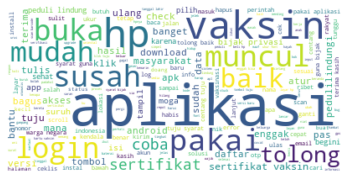

In [60]:
create_wordcloud(SemuaText,"Semua Sentimen")

In [61]:
komenpositif= df_skripsi[df_skripsi['label'] == "Positive"]


In [62]:
Positive = "".join(komenpositif['done_text'])

def create_wordcloud(text, filename): 
    stopwords = set(STOPWORDS)

    wc = WordCloud(background_color="white",
                   max_words=200,
                   stopwords=stopwords)

    wc.generate(text)
    wc.to_file(filename+".png")
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

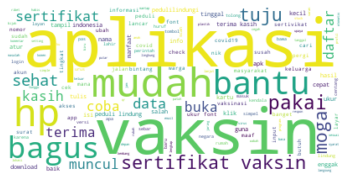

In [63]:
create_wordcloud(Positive,"Semua Positive")

In [64]:
komennegatif= df_skripsi[df_skripsi['label'] == "Negative"]

In [65]:
Negative = "".join(komennegatif['done_text'])

def create_wordcloud(text, filename): 
    stopwords = set(STOPWORDS)

    wc = WordCloud(background_color="white",
                   max_words=200,
                   stopwords=stopwords)

    wc.generate(text)
    wc.to_file(filename+".png")
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

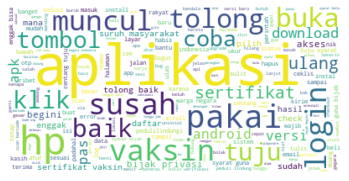

In [66]:
create_wordcloud(Negative,"Semua Negative")